In [17]:
import sympy
from sympy import symbols
from sympy.plotting import plot
sympy.init_printing()
from sympy import*
#-----------------------------
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()
from sympy.physics.quantum import *
from sympy.physics.quantum import Operator, Commutator, AntiCommutator
from sympy.physics.quantum import Dagger, Commutator
#-----------------------------
from sympy.printing.latex import LatexPrinter, print_latex
#-----------------------------
class MyLatexPrinter(LatexPrinter):
    """Print derivative of a function of symbols in a shorter form.
    """
    def _print_Derivative(self, expr):
        function, *vars = expr.args
        if not isinstance(type(function), UndefinedFunction) or \
           not all(isinstance(i, Symbol) for i in vars):
            return super()._print_Derivative(expr)

        # If you want the printer to work correctly for nested
        # expressions then use self._print() instead of str() or latex().
        # See the example of nested modulo below in the custom printing
        # method section.
        return "{}_{{{}}}".format(
            self.print(Symbol(function.func.name_)),
                        ''.join(self._print(i) for i in vars))


def Latex(expr):
    """ Most of the printers define their own wrappers for print().
    These wrappers usually take printer settings. Our printer does not have
    any settings.
    """
    print(MyLatexPrinter().doprint(expr))
#-----------------------------
lambda_1 = Operator(r'\hat{\lambda}_1')
lambda_2 = Operator(r'\hat{\lambda}_2')
lambda_3 = Operator(r'\hat{\lambda}_3')
lambda_4 = Operator(r'\hat{\lambda}_4')
lambda_5 = Operator(r'\hat{\lambda}_5')
lambda_6 = Operator(r'\hat{\lambda}_6')
lambda_7 = Operator(r'\hat{\lambda}_7')
lambda_8 = Operator(r'\hat{\lambda}_8')
theta    = symbols(r'theta')
Operadores = [lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8]
#-----------------------------
def conmutador(A,B):
  return (Commutator(A,B).expand(commutator=True).expand(commutator=True).expand(commutator=True).expand(commutator=True)
        .subs({Commutator(lambda_1,lambda_1):0,
               Commutator(lambda_1,lambda_2):+I*2*lambda_3,
               Commutator(lambda_1,lambda_3):-I*2*lambda_2,
               Commutator(lambda_1,lambda_4):+I*1*lambda_7,
               Commutator(lambda_1,lambda_5):-I*1*lambda_6,
               Commutator(lambda_1,lambda_6):+I*1*lambda_5,
               Commutator(lambda_1,lambda_7):-I*1*lambda_4,
               Commutator(lambda_1,lambda_8):0,


               Commutator(lambda_2,lambda_2):0,
               Commutator(lambda_2,lambda_3):+I*2*lambda_1,
               Commutator(lambda_2,lambda_4):+I*1*lambda_6,
               Commutator(lambda_2,lambda_5):+I*1*lambda_7,
               Commutator(lambda_2,lambda_6):-I*1*lambda_4,
               Commutator(lambda_2,lambda_7):-I*1*lambda_5,
               Commutator(lambda_2,lambda_8):0,



               Commutator(lambda_3,lambda_3):0,
               Commutator(lambda_3,lambda_4):+I*1*lambda_5,
               Commutator(lambda_3,lambda_5):-I*1*lambda_4,
               Commutator(lambda_3,lambda_6):-I*1*lambda_7,
               Commutator(lambda_3,lambda_7):+I*1*lambda_6,
               Commutator(lambda_3,lambda_8):0,

               Commutator(lambda_4,lambda_4):0,
               Commutator(lambda_4,lambda_5):+I*1*lambda_3+I*sqrt(3)*lambda_8,
               Commutator(lambda_4,lambda_6):+I*1*lambda_2,
               Commutator(lambda_4,lambda_7):+I*1*lambda_1,
               Commutator(lambda_4,lambda_8):-I*sqrt(3)*lambda_5,

               Commutator(lambda_5,lambda_5):0,
               Commutator(lambda_5,lambda_6):-I*1*lambda_1,
               Commutator(lambda_5,lambda_7):-I*1*lambda_2,
               Commutator(lambda_5,lambda_8):+I*sqrt(3)*lambda_4,

               Commutator(lambda_6,lambda_6):0,
               Commutator(lambda_6,lambda_7):-I*1*lambda_3+I*sqrt(3)*lambda_8,
               Commutator(lambda_6,lambda_8):-I*sqrt(3)*lambda_7,


               Commutator(lambda_7,lambda_7):0,
               Commutator(lambda_7,lambda_8):+I*sqrt(3)*lambda_6}))
#-----------------------------
def com_order(A,B,n): #regresa el conmutador anidado [A,[A,..[A,B]] n veces.
    if n<=1:
        return conmutador(A,B)
    else:
        return com_order(A,conmutador(A,B),n-1)
#-----------------------------
def BCH(A, B, alpha, n): # Baker_Campbell_Hausdorff formula
    if conmutador(A,B) == 0:
      return B
    a=0
    for i in range(1,n+1):
        a += (alpha**i/factorial(i))*com_order(A,B,i)
    return (B + a)
def collect_all(expresion,lista):
    v_t = 0
    for k in range(len(lista)):
        v_t += (expand(expresion).coeff(lista[k]))*lista[k]
    return v_t    
#-----------------------------
mm = 9
kk = 8
def Busqueda(expresion):
    total = 0
    termino = []
    for k in range(len(Operadores)):
        termino.append(expand(expresion).coeff(Operadores[k]))
    funciones = [cosh(2*theta),sinh(2*theta),cosh(theta),sinh(theta),
                 I*cosh(2*theta),I*sinh(2*theta),I*cosh(theta),I*sinh(theta),
                 -I*cosh(2*theta),-I*sinh(2*theta),-I*cosh(theta),-I*sinh(theta),
                 (cosh(theta)**2+1)/2,-(cosh(theta)**2+1)/2,-(cosh(theta)**2-1)/2,(cosh(theta)**2-1)/2,
                 I*cosh(theta)*sinh(theta),sqrt(3)*(cosh(theta)**2+1)/2,-sqrt(3)*(cosh(theta)**2+1)/2,sqrt(3)*(cosh(theta)**2-1)/2,-sqrt(3)*(cosh(theta)**2-1)/2,
                 -I*cosh(theta)*sinh(theta),sqrt(3)*I*cosh(theta)*sinh(theta),-sqrt(3)*I*cosh(theta)*sinh(theta),sqrt(3)*(cosh(theta)**2-1)/2,
                 sin(theta),cos(theta),-sin(theta),-cos(theta),I*sin(theta),-I*sin(theta),
                 cosh(sqrt(3)*theta),-cosh(sqrt(3)*theta),
                 I*sinh(sqrt(3)*theta),-I*sinh(sqrt(3)*theta)]
    for k in range(len(Operadores)):
        for m in range(len(funciones)):
            if termino[k]== funciones[m].series(theta,0,mm).removeO():
                termino[k]= funciones[m]
    for k in range(len(Operadores)):
        total += termino[k]*Operadores[k]
    return total

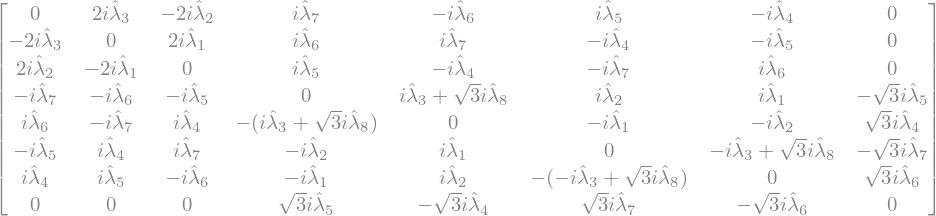

In [18]:
t = symbols(r't')
theta = symbols(r'\theta')
alpha_1 = Function(r'\alpha_1')(t)
alpha_2 = Function(r'\alpha_2')(t)
alpha_3 = Function(r'\alpha_3')(t)
alpha_4 = Function(r'\alpha_4')(t)
alpha_5 = Function(r'\alpha_5')(t)
alpha_6 = Function(r'\alpha_6')(t)
alpha_7 = Function(r'\alpha_7')(t)
alpha_8 = Function(r'\alpha_8')(t)
Tabla = Matrix([[conmutador(op1, op2) for op2 in Operadores] for op1 in Operadores])
Tabla

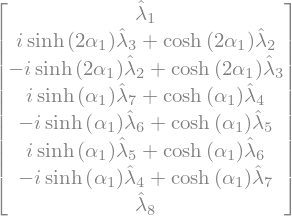

In [19]:
MR_1 = Matrix([[Busqueda(BCH(lambda_1,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_1})
MR_1

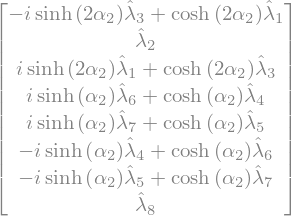

In [20]:
MR_2 = Matrix([[Busqueda(BCH(lambda_2,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_2})
MR_2

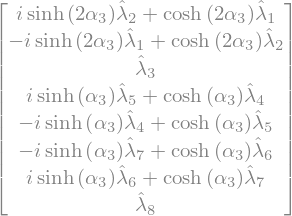

In [21]:
MR_3 = Matrix([[Busqueda(BCH(lambda_3,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_3})
MR_3

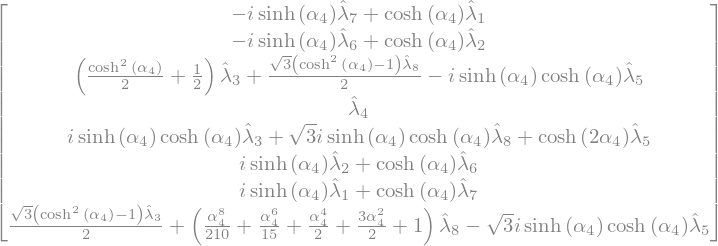

In [22]:
MR_4 = Matrix([[Busqueda(BCH(lambda_4,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_4})
MR_4

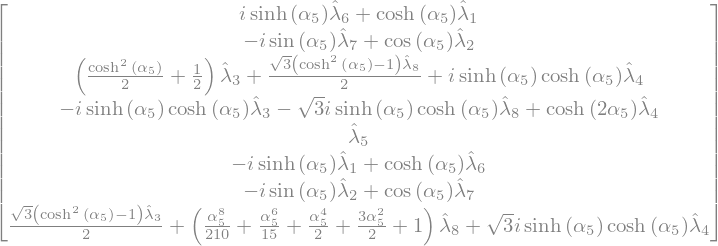

In [23]:
MR_5 = Matrix([[Busqueda(BCH(lambda_5,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_5})
MR_5

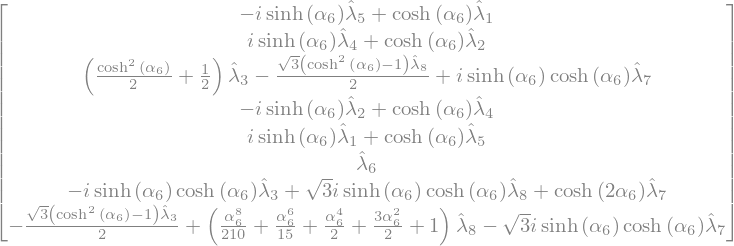

In [24]:
MR_6 = Matrix([[Busqueda(BCH(lambda_6,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_6})
MR_6

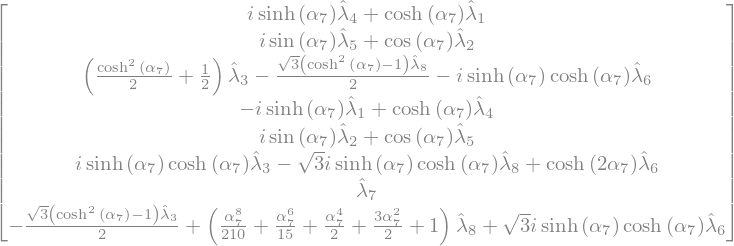

In [25]:
MR_7 = Matrix([[Busqueda(BCH(lambda_7,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_7})
MR_7

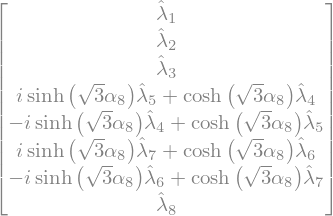

In [26]:
MR_8 = Matrix([[Busqueda(BCH(lambda_8,operadores,theta,kk))] for operadores in Operadores]).subs({theta:alpha_8})
MR_8